<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B09_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer
**<span style="color: 2D3748; background-color:#fff5b1;"></span>**

## 트랜스포머 어텐션
- 어텐션(attention)은 주로 언어 번역에서 사용되기 때문에 인코더와 디코더 네트워크를 사용한다. 
- 즉, 입력에 대한 벡터 변환을 인코더(encoder)에서 처리하고 모든 벡터를 디코더로 보낸다. 
  - 이렇게 모든 벡터를 전달하는 이유는 **<span style="color: 2D3748; background-color:#fff5b1;">시간이 흐를수록 초기 정보를 잃어버리는 기울기 소멸 문제를 해결하기 위함</span>**
- 디코더는 그 정보들을 다 처리한다면 계산량이 많이지므로 은닉상태에 대해 중점적으로 **<span style="color: 2D3748; background-color:#fff5b1;">집중(attention)해서 보아야 할 벡터를 소프트맥스 함수로 점수를 매긴 후 각각을 은닉 상태의 벡터들과 곱한다.</span>**
- 그리고 이 은닉 상태를 모두 더해서 하나의 값으로 만든다.
- 즉, 어텐션은 모든 벡터 중에서 꼭 보아야 할 벡터들을 집중하겠다는 의미.
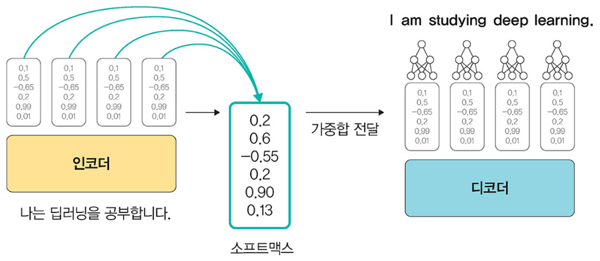


- 트랜스포머는 인코더와 디코더를 여러 개 중첩시킨 구조
- 각각의 디코더를 블록(block)이라고 한다.(논문에선 인코더 블록과 디코더 블록을 여섯 개씩 중첩시킨 구조를 사용)
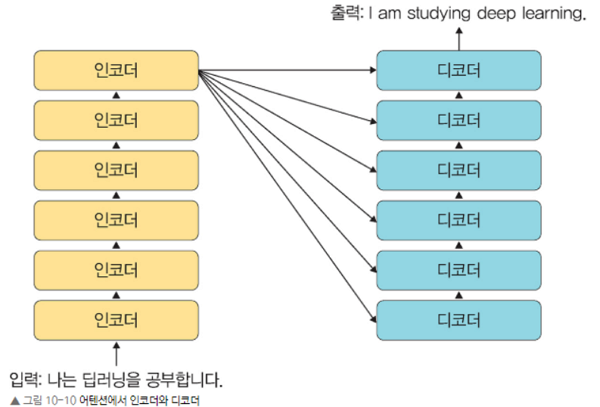

- 하나의 인코더는 <span style="color: 2D3748; background-color:#fff5b1;"></span>**셀프 어텐션(self-attention)**</span>과 <span style="color: 2D3748; background-color:#fff5b1;">**전방향 신경망(feed forward neural network)</span>**으로 구성되어 있다.
- 인코더에서는 단어를 벡터로 임베딩하며, 이를 셀프 어텐션과 전방향 신경망으로 전달한다.
- 셀프 어텐션은 <span style="color: 2D3748; background-color:#fff5b1;"></span>**문장에서 각 단어끼리 얼마나 관계가 있는지를 계산하여 반영한다.**</span>
  - 이를 통해 문장 안에서 단어 간 관계를 파악할 수 있다.
- 셀프 어텐션에서 파악된 단어 간 관계는 전방향 신경망으로 전달된다.  
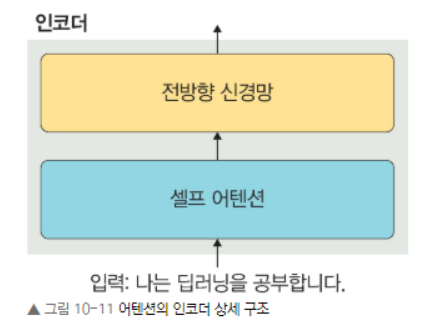


- 디코더는 층을 세 개 가지고 있는데 인코더에서 넘어온 벡터가 처음으로 만나는 것이 셀프 어텐션 층이다.
- 셀프 어텐션 층을 지나면 <span style="color: 2D3748; background-color:#fff5b1;"></span>**인코더-디코더 어텐션(encoder-decoder attention)**</span>층이 있다.
- 인코더-디코더 층에서는 <span style="color: 2D3748; background-color:#fff5b1;"></span>**인코더가 처리한 정보를 받아 어텐션 메카니즘을 수행하고,**</span> 마지막으로 전방향 신경망으로 데이터가 전달된다.  
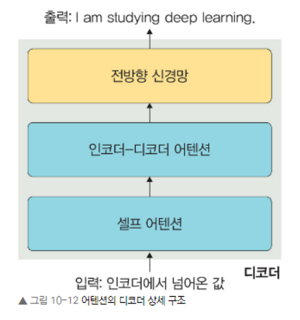

- 어텐션 메카니즘을 작동시키기 위해선 가장 먼저 **<span style="color: 2D3748; background-color:#fff5b1;">어텐션 스코어(attention score)</span>**를 구해야 함
$$e_{ij} = a(s_{i-1}, h_j)$$
- 어텐션 스코어란 **<span style="color: 2D3748; background-color:#fff5b1;">현재 디코더의 시점 $i$에서 단어를 예측하기 위해, 인코더의 모든 은닉 상태$(h_j)$이 디코더의 현 시점의 은닉 상태$(s_{i-1})$와 얼마나 관련이 있는지(유사한지)를 판단하는 값</span>**
- 앞의 수식을 통해 인코더의 모든 은닉 상태의 값과$(h_j)$과 디코더에서의 이전 시점의 은닉 상태$(s_{i-1})$값을 이용하여 계산할 수 있다.

<br>

- 어텐션 스코어가 계산되었다면, 이 값을 소프트 맥스(softmax) 함수에 적용하여 확률로 변환한다.
- 이렇게 계산된 0~1 사이의 값들이 특정 시점(time step)에 대한 가중치, 즉 시간의 가중치가 되어 다음과 같은 수식을 이용한다.
$$a_{ij} = \frac{\exp (e_{ij})}{∑^{T_x}_{k=1}\exp(e_{ik})}$$
- 이를 이용하여 시간의 가중치($a_{ij}$)와 은닉상태($h_j$}의 가중합을 계산하면 하나의 벡터가 계산되는데, 이것이 **<span style="color: 2D3748; background-color:#fff5b1;">컨텍스트 벡터(context_vector)</span>**이며 수식은 다음과 같다
$$c_i=∑^{T_x}_{j=1} a_{ij} h_j$$

- 마지막으로 디코더의 은닉 상태를 구해야 하는데 이를 위해선 컨텍스트 벡터와 디코더 이전 시점의 은닉 상태와 출력이 필요하다
- 다음과 같이 어텐션이 적용된 인코더-디코더의 수식에서는 컨텍스트 벡터($c_i$)가 계속 변하고 있는 반면에 어텐션이 적용되지 않은 인코더-디코더 수식에서는 컨텍스트 벡터($c$)가 고정되어 있다.
- 이전 시점의 은닉 상태 값을 구하는 공식은 다음과 같다

<center>(어텐션 적용) 이전 시점의 은닉상태 값을 구하는 수식: $s_i = f(s_{i-1}, y_{i-1}, c_i$)</center>
<center>(어텐션 미적용) 이전 시점의 은닉상태 값을 구하는 수식: $s_i = f(s_{i-1}, y_{i-1}, c$)</center>

이 모든 과정을 순전파 과정을 통해 정리하면 다음과 같다


In [ ]:
https://thinkinfi.com/fasttext-word-embeddings-python-implementation/

In [ ]:
https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/09/glove/